<a href="https://colab.research.google.com/github/bartoszgajda55/Tensorflow2DeepLearning/blob/master/TF2.0%20Linear%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
# Load in the data
data = load_breast_cancer()

In [6]:
# Check the type of 'data'
type(data)

sklearn.utils.Bunch

In [7]:
# Bunch is like dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
# 'data' is the input data
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
# Feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
# Get train_test_split import
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [14]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Building the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D, )),
  tf.keras.layers.Dense(1, activation="sigmoid")                                    
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 1.3445 - accuracy: 0.1391 - val_loss: 1.3383 - val_accuracy: 0.1383
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2228 - accuracy: 0.1575 - val_loss: 1.2188 - val_accuracy: 0.1543
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1129 - accuracy: 0.1969 - val_loss: 1.1070 - val_accuracy: 0.1809
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0096 - accuracy: 0.2467 - val_loss: 1.0057 - val_accuracy: 0.2340
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9163 - accuracy: 0.3281 - val_loss: 0.9154 - val_accuracy: 0.3138
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8337 - accuracy: 0.4068 - val_loss: 0.8341 - val_accuracy: 0.4149
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7617 - accuracy: 0.4908 - val_loss: 0.7625 - val_accuracy: 0.4894
Epoch 8/100


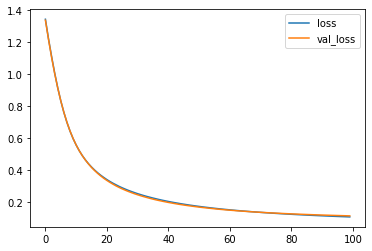

In [16]:
# Plot whats returned by 'fit'
import matplotlib.pyplot as plt
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

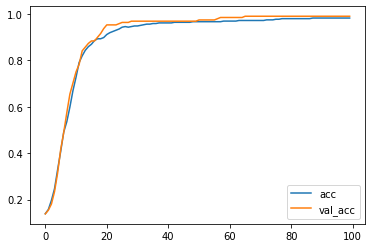

In [17]:
# Plot accuracy as well
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

In [18]:
# Saving and loading a model

In [19]:
model.save("linearclassifier.h5")

In [20]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul 12 12:24 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jun 26 16:26 sample_data


In [22]:
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9894


[0.11427219957113266, 0.9893617033958435]